## Beispiele zu Graphen in `networkx`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

matplotlib.rcParams['figure.figsize'] = [12., 8.]

log_debug = False
def debug(msg, *args, **kwargs):
    if log_debug:
        print(msg.format(*args, **kwargs))

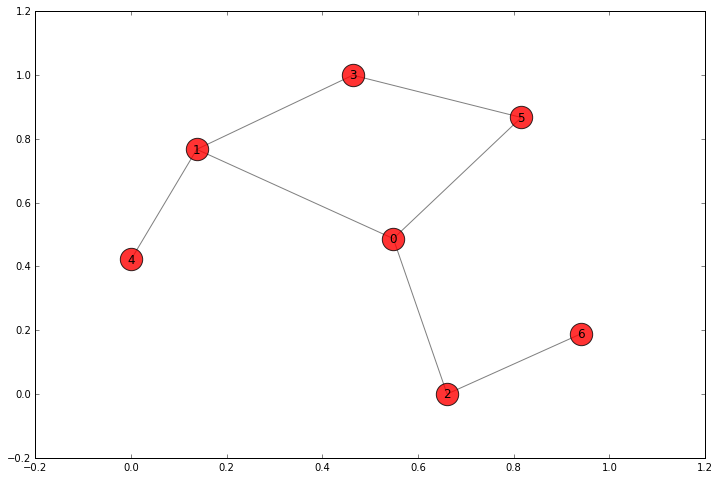

In [2]:
G = nx.Graph()

G.add_nodes_from([i for i in range(7)])
G.add_edges_from([(0,1),(0,2),(0,5),(1,3),(1,4),(2,6),(3,5)])

# positions for all nodes
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

#labels
nx.draw_networkx_labels(G, pos)

plt.show()

In [3]:
for node in G.nodes():
    print('node %d - neighbors: %s' % (node, nx.neighbors(G, node)))

node 0 - neighbors: [1, 2, 5]
node 1 - neighbors: [0, 3, 4]
node 2 - neighbors: [0, 6]
node 3 - neighbors: [1, 5]
node 4 - neighbors: [1]
node 5 - neighbors: [0, 3]
node 6 - neighbors: [2]


In [4]:
nx.bfs_successors(G, 0)

{0: [1, 2, 5], 1: [3, 4], 2: [6]}

In [5]:
nx.bfs_successors(G, 1)

{0: [2, 5], 1: [0, 3, 4], 2: [6]}

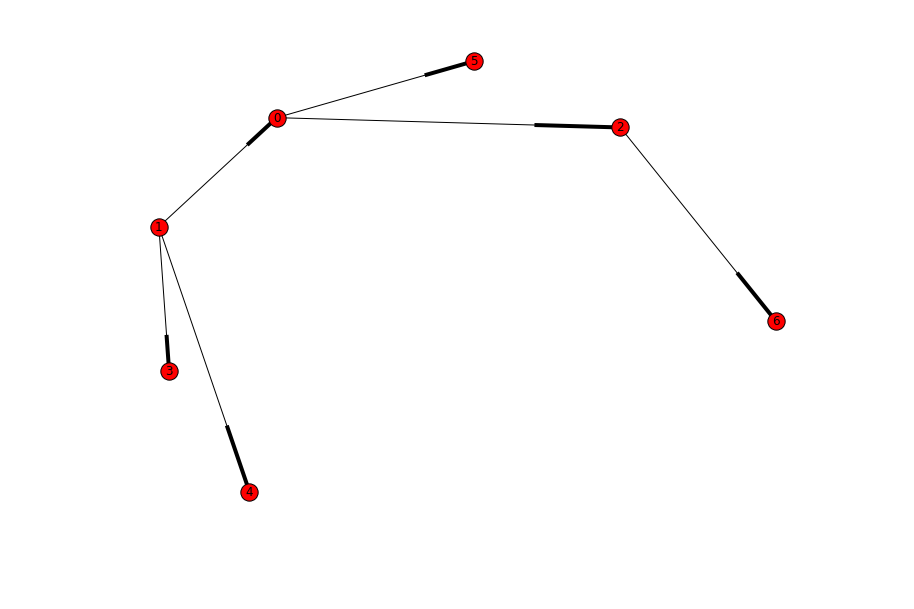

In [6]:
bfs_tree = nx.bfs_tree(G, 1)
pos = nx.spring_layout(bfs_tree)

nx.draw(bfs_tree,pos)
nx.draw_networkx_labels(bfs_tree,pos)
plt.show()

### Depth first search

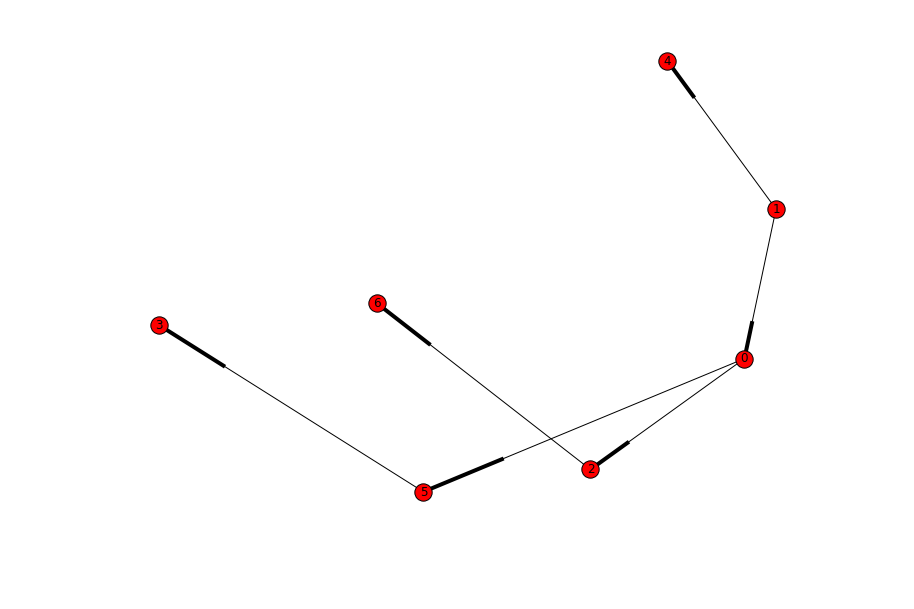

In [7]:
dfs_tree = nx.dfs_tree(G, 1)
pos = nx.spring_layout(dfs_tree)

nx.draw(dfs_tree, pos)
nx.draw_networkx_labels(dfs_tree, pos)
plt.show()

In [8]:
nx.dfs_successors(G, 0)

{0: [1, 2], 1: [3, 4], 2: [6], 3: [5]}

In [9]:
nx.dfs_successors(G, 1)

{0: [2, 5], 1: [0, 4], 2: [6], 5: [3]}

In [10]:
def crawl_dfs_iter(graph, root, max_visits=10):
    """Generator der einen Graph anhand seiner Kanten mit Hilfe von
    depth first search in iterativer Variante crawlt. Die Id des
    besuchten Knoten wird dabei geliefert.
    
    :param edges: Liste mit 2-Tupeln, die alle Kanten des Graphen beinhalten
    :param root: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    """
    visited = 0
    S = set()
    Q = [] 
    Q.append(root)
    while Q and visited < max_visits:
        
        node = Q.pop()
        yield node
        visited += 1
        if node not in S and visited < max_visits:
            S.add(node)
            neighbors = nx.neighbors(graph, node)
            
            # umdrehen der nachbarn, damit diese in der richtigen
            # reihenfolge durch pop wieder entnommen werden
            neighbors.reverse()
            for neighbor in neighbors:
                Q.append(neighbor)

In [11]:
nodes = [n for n in crawl_dfs_iter(dfs_tree, 1, len(G.nodes()))]
for i in range(len(nodes)):
    print('{:>4d}.: {_id:d}'.format(i + 1, _id=nodes[i]))

   1.: 1
   2.: 0
   3.: 2
   4.: 6
   5.: 5
   6.: 3
   7.: 4


### Breadth first search

In [12]:
nx.bfs_successors(G, 0)

{0: [1, 2, 5], 1: [3, 4], 2: [6]}

In [13]:
nx.bfs_successors(G, 1)

{0: [2, 5], 1: [0, 3, 4], 2: [6]}

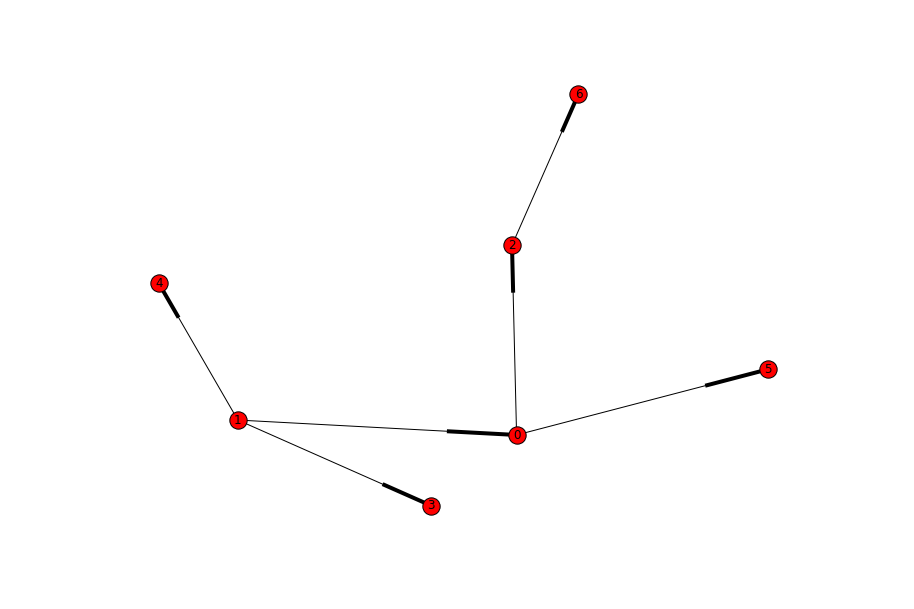

In [14]:
bfs_tree = nx.bfs_tree(G, 1)
pos = nx.spring_layout(bfs_tree)

nx.draw(bfs_tree,pos)
nx.draw_networkx_labels(bfs_tree,pos)
plt.show()

In [15]:
def crawl_bfs_iter(graph, root, max_visits=10):
    visited = 0
    # Verwendung von Q als Queue (FIFO)
    Q = []
    S = set()
    
    Q.append(root)
    S.add(root)
    
    while Q and visited < max_visits:
        node = Q.pop(0)
        yield node
        visited += 1
        neighbors = nx.neighbors(graph, node)
        for neighbor in neighbors:
            if neighbor not in S:
                S.add(neighbor)
                Q.append(neighbor)

In [16]:
nodes = [n for n in crawl_bfs_iter(bfs_tree, 1, len(G.nodes()))]
for i in range(len(nodes)):
    print('{:>4d}.: {_id:d}'.format(i + 1, _id=nodes[i]))

   1.: 1
   2.: 0
   3.: 3
   4.: 4
   5.: 2
   6.: 5
   7.: 6


### Random walk

In [17]:
import random

def random_walk(graph, root, max_visits=10):
    """Generator der einen Graph anhand seiner Kanten mit Hilfe von
    random walk in iterativer Variante crawlt. Die Id des
    besuchten Knoten wird dabei geliefert.
    
    :param graph: Graph ueber den der random walk ausgefuehrt werden soll
    :param root: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    """
    visited = 0
    S = set()
    
    # die queue enthaelt im gegensatz zu den anderen implementierungen
    # den pfad, der im random walk gelaufen wurde
    Q = []
    Q.append(root)
    debug('{:>10s}: {:s}', 'Q', str(Q))
    while Q and visited < max_visits:
        
        node = Q[-1]
        debug('{:>10s}: {:d}', 'yield', node)
        yield node
        visited += 1
        if node not in S and visited < max_visits:
            S.add(node)
            debug('{:>10s}: {:s}', 'S', str(S))
            
            # nachbarn die noch nicht besucht wurden
            neighbors = [n for n in nx.neighbors(graph, node) if n not in S]
            debug('{:>10s}: {:s}', 'neighbors', str(neighbors))
            up = -2
            
            # solange alle nachbarn des gewaehlten knotens besucht wurden
            # wird der knoten von der queue entfernt und neue nachbarn
            # gesucht
            while not neighbors:
                node = Q[up]
                debug('{:>10s}: {:d}', 'pop to', node)
                neighbors = [n for n in nx.neighbors(graph, node) if n not in S]
                up -= 1
            
            # ansonsten waehle einen zufaelligen nachbar aus
            # und schiebe ihn auf die queue
            neighbor = random.choice(neighbors)
            debug('{:>10s}: {:d}', 'neighbor', neighbor)
            Q.append(neighbor)
            debug('{:>10s}: {:s}', 'Q', str(Q))

log_debug = True
nodes = [n for n in random_walk(G, 1, len(G.nodes()))]
for i in range(len(nodes)):
    print('{:>4d}.: {_id:d}'.format(i + 1, _id=nodes[i]))

         Q: [1]
     yield: 1
         S: {1}
 neighbors: [0, 3, 4]
  neighbor: 0
         Q: [1, 0]
     yield: 0
         S: {0, 1}
 neighbors: [2, 5]
  neighbor: 2
         Q: [1, 0, 2]
     yield: 2
         S: {0, 1, 2}
 neighbors: [6]
  neighbor: 6
         Q: [1, 0, 2, 6]
     yield: 6
         S: {0, 1, 2, 6}
 neighbors: []
    pop to: 2
    pop to: 0
  neighbor: 5
         Q: [1, 0, 2, 6, 5]
     yield: 5
         S: {0, 1, 2, 5, 6}
 neighbors: [3]
  neighbor: 3
         Q: [1, 0, 2, 6, 5, 3]
     yield: 3
         S: {0, 1, 2, 3, 5, 6}
 neighbors: []
    pop to: 5
    pop to: 6
    pop to: 2
    pop to: 0
    pop to: 1
  neighbor: 4
         Q: [1, 0, 2, 6, 5, 3, 4]
     yield: 4
   1.: 1
   2.: 0
   3.: 2
   4.: 6
   5.: 5
   6.: 3
   7.: 4
